In [1]:
from qiskit import QuantumCircuit , execute , Aer , BasicAer
from qiskit.visualization import plot_histogram
import numpy as np

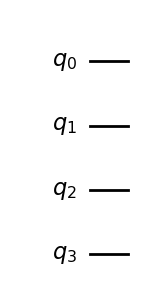

In [2]:
n=3
# for f is constant and function = 0
f0 = QuantumCircuit(n+1)
f0.draw('mpl')

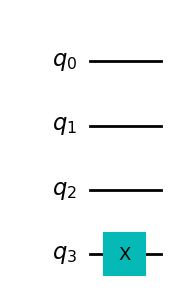

In [3]:
# for f is const and function is 1
f0 = QuantumCircuit(n+1)
f0.x(n)
f0.draw('mpl')

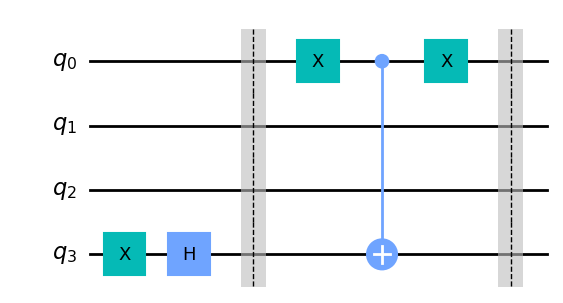

In [4]:
# for f is a half balanced function
fhalf = QuantumCircuit(n+1)

xgate= "100"
cxgate= "100"

fhalf.x(n)
fhalf.h(n)

fhalf.barrier()

for gate in range(n):
    if xgate[gate] == '1':
        fhalf.x(gate)
        

for gate in range(n):
    if cxgate[gate] == "1":
        fhalf.cx(gate,n)

for gate in range(n):
    if xgate[gate] == '1':
        fhalf.x(gate)

fhalf.barrier()

fhalf.draw('mpl')
        



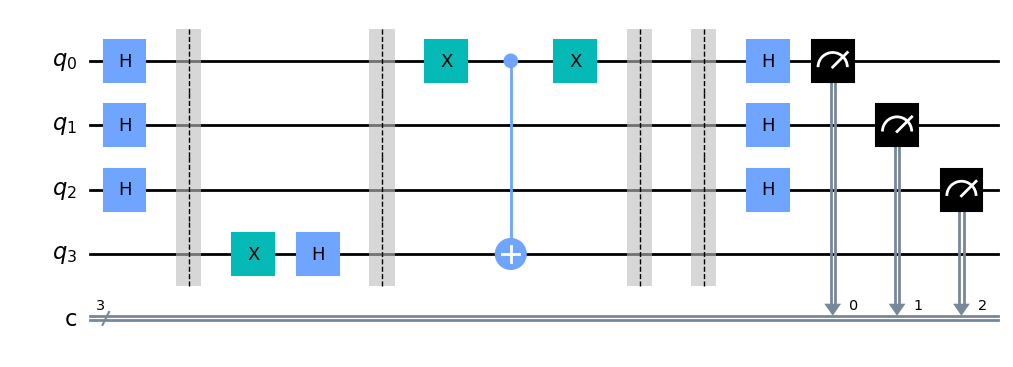

In [5]:
ckt = QuantumCircuit(n+1,n)

for gate in range(n):
    ckt.h(gate)

ckt.barrier()

ckt = ckt.compose(fhalf, qubits=ckt.qubits)

ckt.barrier()

for gate in range(n):
    ckt.h(gate)

for gate in range(n):
    ckt.measure(gate,gate)

ckt.draw('mpl')

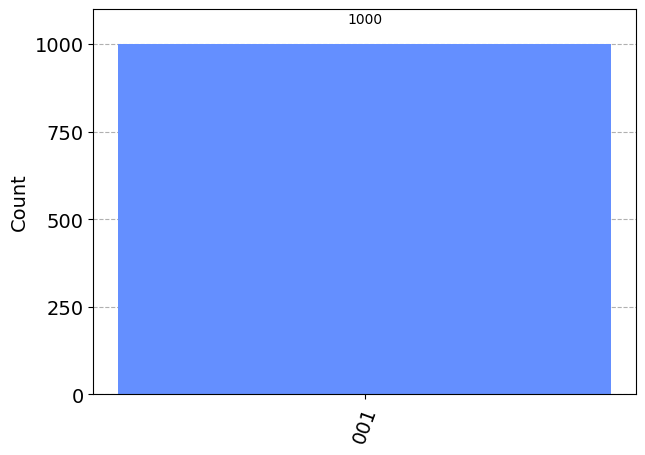

In [6]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1000
results = execute(ckt, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

In [7]:
from qiskit import IBMQ
IBMQ.save_account("e3bec9ec471ad0c4627fda0a9a41ed489635138fa3e7e00bdbd9cd10830922265b1fbaeba71bdefb5717d492cd96a661b8f42f4a330c9b491d06b7a0885e59b8",overwrite = True)

/var/folders/st/sgk4ydvx7vjfs18cwxz8vm7r0000gn/T/ipykernel_92276/3874975701.py:2: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.save_account("e3bec9ec471ad0c4627fda0a9a41ed489635138fa3e7e00bdbd9cd10830922265b1fbaeba71bdefb5717d492cd96a661b8f42f4a330c9b491d06b7a0885e59b8",overwrite = True)
/var/folders/st/sgk4ydvx7vjfs18cwxz8vm7r0000gn/T/ipykernel_92276/3874975701.py:2: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qi

In [11]:
provider=IBMQ.load_account()
backend=provider.get_backend('ibmq_belem')

ibmqfactory.load_account:WARNING:2023-08-17 12:58:26,002: Credentials are already in use. The existing account in the session will be replaced.


In [12]:
job = execute(ckt, backend=backend, shots=1024)
counts=job.result().get_counts()

Job Status: job has successfully run


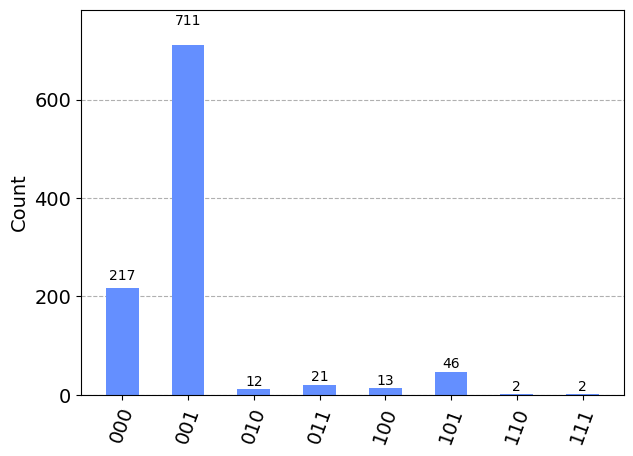

In [13]:
from qiskit.tools import job_monitor
job_monitor(job)

job.status()

plot_histogram(counts)